# Propiedades y tipos de Relaciones en $U^2$
---
Ahora vamos a restringirnos a las relaciones que puedan definirse solo entre un conjunto consigo mismo $U^2 = U \times U$.

Las siguientes propiedades y tipos de relaciones solo aplican a conjuntos $A^2, B^2$ or $U^2$

## Propiedades:
---

Las relaciones son un predicado de dos argumentos (𝓡:A→B  o a𝓡b). Mapea los elementos de un conjunto a elementos de otro con n-tuplas (a, b). Entonces a𝓡b  es un predicado que trabaja con un n-tupla por tanto sus valores son bool.

Las tuplas que cumplen la relación generan un nuevo conjunto 𝓡 de elementos que cumplen con  a𝓡b por tanto 𝓡⊂A×B.

Hay 3 propiedades que puede tener una relacion 𝓡 en $(a,b) \in U^2$:
> * **Reflexiva:** cuando existe una relacion del elemento consigo mismo. Si $_a𝓡_a$ se cumple entonces 𝓡 tiene tuplas $(a,a)$ del elemento consigo mismo. Ahora, no tiene porque solo haber tuplas reflexivas $(a,a)$ pero si para todos los elmentos del producto tiene su tupla reflexiva entonces la relacion tiene la propiedad reflexiva, en predicado sería $∀(a,a)\in A×A |\; _a𝓡_a$ entonces en logica de conjuntos seria $\{(a,a) | a\in A\} ⊂𝓡$ es decir las tuplas reflexivas $(a,a)$ son un subconjunto de la relación 𝓡.


> * **Simétrica:** cuando dentro del conjunto 𝓡 tenemos pares de tuplas simetricas, es decir $(a,b)$ y $(b,a)$, la tupla con la inversa, este se puede entender como si existe el camino de ida $(a,b)$ entonces existe el camino de vuelta $(b,a)$, en predicado seria $∀(a, b) \in A×B |\; _a𝓡_b → \; _b𝓡_a$, en logica de conjuntos sería $𝓡^{-1} ⊂ 𝓡$, es decir que las relaciones inversa esta presente en el conjunto relacion 𝓡 para todos los elementos.

> * **Antisimétrica:** es la que prohibe que haya simetria, es decir no puede existir $(a,b)$ y $(b,a)$ dentro de 𝓡, en el único caso que se permite es $(a,a)$ es decir reflexivas pero no es obligatorio. Esto el logica seria $∀(a, b) \in A×B |\; _a𝓡_b ∧ \; _b𝓡_a → a = b$, en conjuntos se puede ver como $𝓡^{-1}∩ 𝓡 ⊂ \{(a,a) | a\in A\}$

> * **Transitiva:** esta permite la existencia de caminos intermedios o caminos ciclicos, es decir si en el conjunto 𝓡 tenemos $(a,b)$ y $(b,c)$ entonces debe estar también $(c, a)$ volviendo al origen y cerrando el circulo (a → b → c → a). En logica de predicados seria $∀a, b,
c \in U |\; _a𝓡_b ∧ \; _b𝓡_c → _c𝓡_a$, en conjuntos seria como $𝓡 \circ 𝓡 ⊂ 𝓡$.

Entonces un conjunto relacion 𝓡 puede **tener una o varias de estas propiedades a la vez**. Una relación 𝓡 que unicamente es reflexiva es todas las otras propiedades a la vez si se analiza bien.

In [2]:
using Plots
# Definirmos el producto: A×B={(x,y)|x∈A,y∈B}
const × = (A, B) -> Set((x, y) for x ∈ A for y ∈ B)

# Definimos representacion matricial de predicado
prod_rep(A, B) = [(a, b) for a in sort(collect(A)), b in sort(collect(B))]

# Definimos la composicion
import Base: ∘
function ∘(𝓢::Set{Tuple{T,T}}, 𝓡::Set{Tuple{T,T}}) where T
    # 𝓢∘𝓡 = {(x, z) ∈ A² ∃y ∈ A | (x, y) ∈ 𝓡 ∧ (y, z) ∈ 𝓢}
    predicado_M = [(x, y) ∈ 𝓡 && (y, z) ∈ 𝓢 for (x,z) ∈ A × A, y ∈ A]
    ∃y = map(any, eachrow(predicado_M))
    return Set{Tuple{T,T}}(collect(A²)[∃y])
end

prod_rep (generic function with 1 method)

### Reflexiva

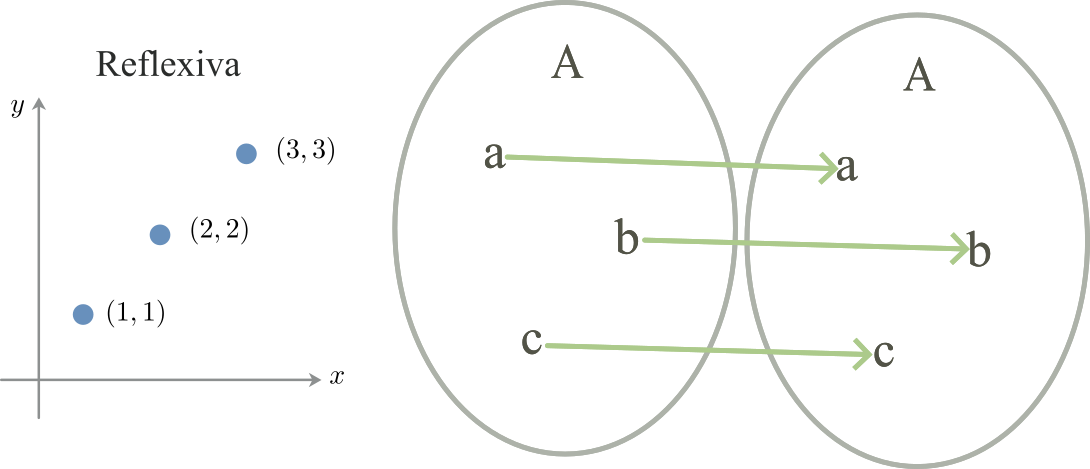

In [ ]:
A = Set('a':'g')
A² = A × A
println("Propiedad reflexiva")
println("-------------------------")
# 1. Calcula el producto cartesiano
A²_M = prod_rep(A, A)
println("A² = A × A: ")
display(A²_M)
# 2. Predicado: (x,y) ∈ A² | x = y
ₐ𝓡ₐ(tup) = tup[1] == tup[2]
𝓡 = Set(tup for tup ∈ A² if ₐ𝓡ₐ(tup))
println("Conjunto Relación 𝓡: $(𝓡)")
𝓡_repre(tup) = tup ∈ 𝓡
println("Predicado (x,y) ∈ A² | x = y: ")
display(𝓡_repre.(A²_M))
# 3. Check: si 𝓡 es reflexiva según la proposición ∀x∈U | xRx o {(a,a)|a∈A} ⊂ 𝓡.
es_reflexiva = Set([(a, a) for a ∈ A]) ⊆ 𝓡
println("¿R es reflexiva?: ", es_reflexiva)

Propiedad reflexiva
-------------------------
A² = A × A: 


7×7 Matrix{Tuple{Char, Char}}:
 ('a', 'a')  ('a', 'b')  ('a', 'c')  …  ('a', 'e')  ('a', 'f')  ('a', 'g')
 ('b', 'a')  ('b', 'b')  ('b', 'c')     ('b', 'e')  ('b', 'f')  ('b', 'g')
 ('c', 'a')  ('c', 'b')  ('c', 'c')     ('c', 'e')  ('c', 'f')  ('c', 'g')
 ('d', 'a')  ('d', 'b')  ('d', 'c')     ('d', 'e')  ('d', 'f')  ('d', 'g')
 ('e', 'a')  ('e', 'b')  ('e', 'c')     ('e', 'e')  ('e', 'f')  ('e', 'g')
 ('f', 'a')  ('f', 'b')  ('f', 'c')  …  ('f', 'e')  ('f', 'f')  ('f', 'g')
 ('g', 'a')  ('g', 'b')  ('g', 'c')     ('g', 'e')  ('g', 'f')  ('g', 'g')

Conjunto Relación 𝓡: Set([('c', 'c'), ('f', 'f'), ('e', 'e'), ('d', 'd'), ('b', 'b'), ('g', 'g'), ('a', 'a')])
Predicado (x,y) ∈ A² | x = y: 


7×7 BitMatrix:
 1  0  0  0  0  0  0
 0  1  0  0  0  0  0
 0  0  1  0  0  0  0
 0  0  0  1  0  0  0
 0  0  0  0  1  0  0
 0  0  0  0  0  1  0
 0  0  0  0  0  0  1

¿R es reflexiva?: true


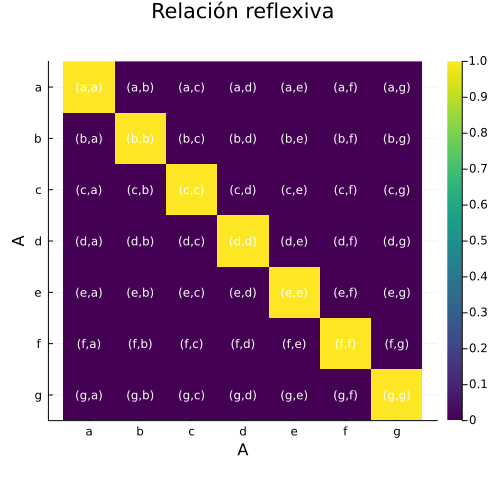

In [ ]:
A = collect('a':'g')
M = 𝓡_repre.(A²_M)
M_int = Int.(M)

# 1. Creamos el heatmap y lo guardamos en `p`
p = Plots.heatmap(
    1:length(A), 1:length(A), M_int;
    xlabel = "A",
    ylabel = "A",
    title = "Relación reflexiva",
    aspect_ratio = :equal,
    colorbar = true,
    yflip = true,
    xticks = (1:length(A), string.(A)),
    yticks = (1:length(A), string.(A)),
    c = :viridis,
    size = (500, 500),
)

# 2. Agregamos todas las anotaciones al plot `p`
for (i, a) in enumerate(A), (j, b) in enumerate(A)
    annotate!(p, j, i, Plots.text("($a,$b)", 8, :white, halign = :center))
end

# 3. Mostramos (o devolvemos) la figura
display(p)

### Simétrica

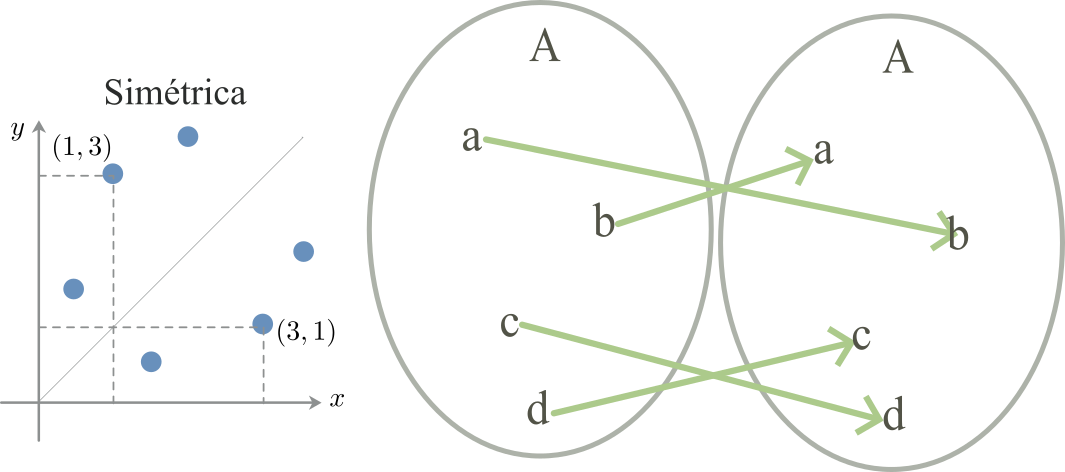

In [ ]:
A = Set('a':'g')
A² = A × A
println("Propiedad simétrica")
println("-------------------------")
# 1. Calcula el producto cartesiano
A²_M = prod_rep(A, A)
println("A² = A × A: ")
display(A²_M)

# 2. Predicado: (x,y) ∈ A² | x ≠ y
x𝓡y(tup) = tup[1] != tup[2]
# Nota: otra opcion de relacion simetrica es con vocales
# vocales = Set(['a','e','i','o','u'])
# x𝓡y(tup) = tup[1] ∈ vocales ||  tup[2] ∈ vocales
𝓡⁻¹(tup) = x𝓡y((tup[2],  tup[1]))
𝓡 = Set(tup for tup ∈ A² if x𝓡y(tup))
println("Conjunto Relación 𝓡: $(𝓡)")
𝓡_repre(tup) = tup ∈ 𝓡
println("Predicado (x,y) ∈ A² | x ≠ y: ")
display(𝓡_repre.(A²_M))

# 3. Check: si R es simétrica según la proposición ∀x,y∈U | xRy → yRx.
isymetric(tup) = !x𝓡y(tup) || 𝓡⁻¹(tup)
es_simetrica = all(isymetric(tup) for tup in A²)
println("¿R es simétrica?: ", es_simetrica)

Propiedad simétrica
-------------------------
A² = A × A: 


7×7 Matrix{Tuple{Char, Char}}:
 ('a', 'a')  ('a', 'b')  ('a', 'c')  …  ('a', 'e')  ('a', 'f')  ('a', 'g')
 ('b', 'a')  ('b', 'b')  ('b', 'c')     ('b', 'e')  ('b', 'f')  ('b', 'g')
 ('c', 'a')  ('c', 'b')  ('c', 'c')     ('c', 'e')  ('c', 'f')  ('c', 'g')
 ('d', 'a')  ('d', 'b')  ('d', 'c')     ('d', 'e')  ('d', 'f')  ('d', 'g')
 ('e', 'a')  ('e', 'b')  ('e', 'c')     ('e', 'e')  ('e', 'f')  ('e', 'g')
 ('f', 'a')  ('f', 'b')  ('f', 'c')  …  ('f', 'e')  ('f', 'f')  ('f', 'g')
 ('g', 'a')  ('g', 'b')  ('g', 'c')     ('g', 'e')  ('g', 'f')  ('g', 'g')

Conjunto Relación 𝓡: Set([('e', 'f'), ('e', 'c'), ('a', 'g'), ('f', 'b'), ('g', 'b'), ('a', 'e'), ('c', 'e'), ('c', 'a'), ('c', 'b'), ('e', 'd'), ('f', 'd'), ('d', 'c'), ('c', 'f'), ('b', 'd'), ('a', 'b'), ('d', 'b'), ('e', 'b'), ('a', 'f'), ('b', 'g'), ('b', 'c'), ('g', 'f'), ('d', 'g'), ('b', 'e'), ('e', 'g'), ('c', 'g'), ('g', 'a'), ('a', 'd'), ('f', 'e'), ('c', 'd'), ('d', 'a'), ('b', 'a'), ('f', 'c'), ('f', 'a'), ('g', 'e'), ('g', 'd'), ('e', 'a'), ('d', 'f'), ('f', 'g'), ('d', 'e'), ('g', 'c'), ('a', 'c'), ('b', 'f')])
Predicado (x,y) ∈ A² | x ≠ y: 


7×7 BitMatrix:
 0  1  1  1  1  1  1
 1  0  1  1  1  1  1
 1  1  0  1  1  1  1
 1  1  1  0  1  1  1
 1  1  1  1  0  1  1
 1  1  1  1  1  0  1
 1  1  1  1  1  1  0

¿R es simétrica?: true


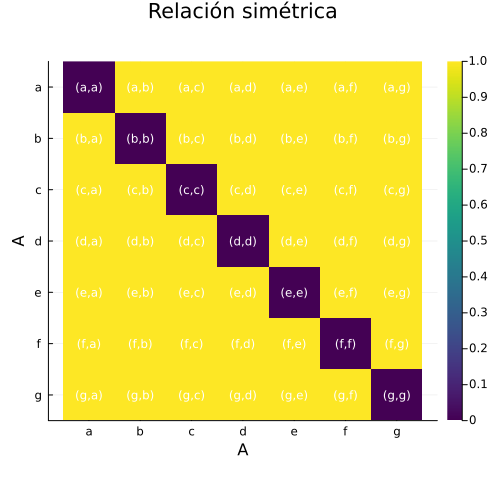

In [ ]:
A = collect('a':'g')
M = 𝓡_repre.(A²_M)
M_int = Int.(M)

# 1. Creamos el heatmap y lo guardamos en `p`
p = Plots.heatmap(
    1:length(A), 1:length(A), M_int;
    xlabel = "A",
    ylabel = "A",
    title = "Relación simétrica",
    aspect_ratio = :equal,
    colorbar = true,
    yflip = true,
    xticks = (1:length(A), string.(A)),
    yticks = (1:length(A), string.(A)),
    c = :viridis,
    size = (500, 500),
)

# 2. Agregamos todas las anotaciones al plot `p`
for (i, a) in enumerate(A), (j, b) in enumerate(A)
    annotate!(p, j, i, Plots.text("($a,$b)", 8, :white, halign = :center))
end

# 3. Mostramos (o devolvemos) la figura
display(p)

### Antisimétrica

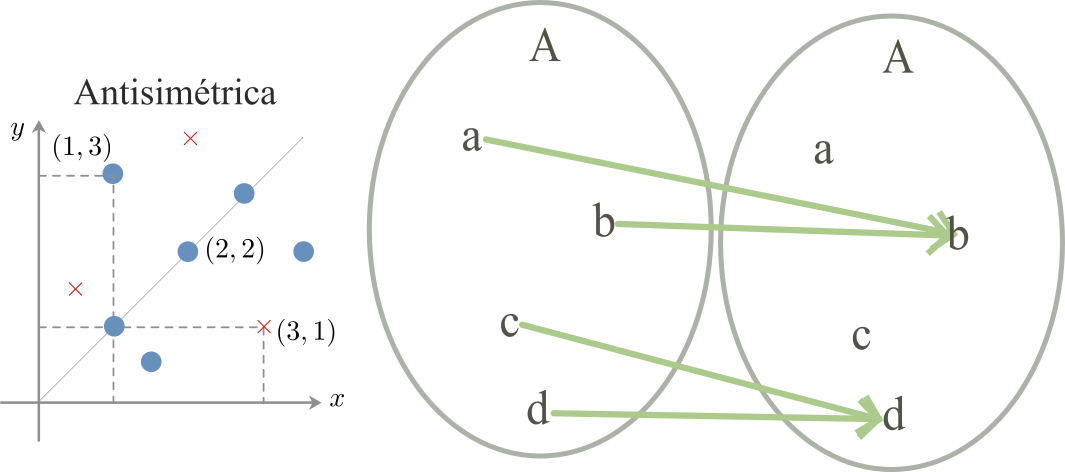

In [ ]:
A = Set('a':'g')
A² = A × A
println("Propiedad Antisimétrica")
println("-------------------------")
# 1. Calcula el producto cartesiano
A²_M = prod_rep(A, A)
println("A² = A × A: ")
display(A²_M)

# 2. Predicado: (x,y) ∈ A² | x = d ∨ x = y
x𝓡y(tup) = (tup[1] == 'd') || (tup[1] == tup[2])
𝓡⁻¹(tup) = x𝓡y((tup[2],  tup[1]))
𝓡 = Set(tup for tup ∈ A² if x𝓡y(tup))
println("Conjunto Relación 𝓡: $(𝓡)")
𝓡_repre(tup) = tup ∈ 𝓡
println("Predicado (x,y) ∈ A² | x = d ∨ x = y: ")
display(𝓡_repre.(A²_M))

# 3. Check: si R es antisimétrica según la proposición ∀x,y∈U | xRy ∧ yRx → x=y
isantisymetric(tup) = !(x𝓡y(tup) && 𝓡⁻¹(tup)) || tup[1] == tup[2]
es_antisimetrica = all(isantisymetric(tup) for tup ∈ A²)
println("¿R es antisimétrica?: ", es_antisimetrica)

Propiedad Antisimétrica
-------------------------
A² = A × A: 


7×7 Matrix{Tuple{Char, Char}}:
 ('a', 'a')  ('a', 'b')  ('a', 'c')  …  ('a', 'e')  ('a', 'f')  ('a', 'g')
 ('b', 'a')  ('b', 'b')  ('b', 'c')     ('b', 'e')  ('b', 'f')  ('b', 'g')
 ('c', 'a')  ('c', 'b')  ('c', 'c')     ('c', 'e')  ('c', 'f')  ('c', 'g')
 ('d', 'a')  ('d', 'b')  ('d', 'c')     ('d', 'e')  ('d', 'f')  ('d', 'g')
 ('e', 'a')  ('e', 'b')  ('e', 'c')     ('e', 'e')  ('e', 'f')  ('e', 'g')
 ('f', 'a')  ('f', 'b')  ('f', 'c')  …  ('f', 'e')  ('f', 'f')  ('f', 'g')
 ('g', 'a')  ('g', 'b')  ('g', 'c')     ('g', 'e')  ('g', 'f')  ('g', 'g')

Conjunto Relación 𝓡: Set([('b', 'b'), ('d', 'c'), ('d', 'b'), ('d', 'g'), ('a', 'a'), ('f', 'f'), ('d', 'a'), ('c', 'c'), ('e', 'e'), ('d', 'd'), ('d', 'f'), ('g', 'g'), ('d', 'e')])
Predicado (x,y) ∈ A² | x = d ∨ x = y: 


7×7 BitMatrix:
 1  0  0  0  0  0  0
 0  1  0  0  0  0  0
 0  0  1  0  0  0  0
 1  1  1  1  1  1  1
 0  0  0  0  1  0  0
 0  0  0  0  0  1  0
 0  0  0  0  0  0  1

¿R es antisimétrica?: true


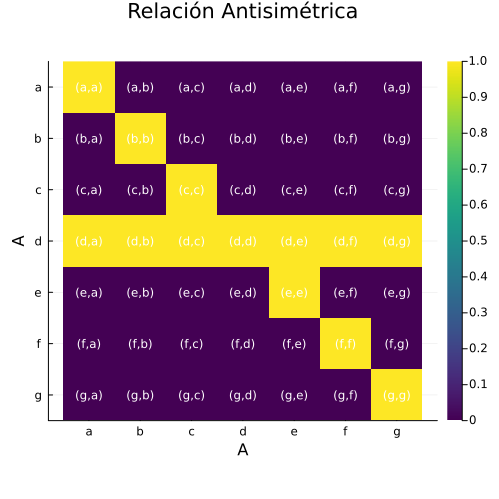

In [ ]:
A = collect('a':'g')
M = 𝓡_repre.(A²_M)
M_int = Int.(M)

# 1. Creamos el heatmap y lo guardamos en `p`
p = Plots.heatmap(
    1:length(A), 1:length(A), M_int;
    xlabel = "A",
    ylabel = "A",
    title = "Relación Antisimétrica",
    aspect_ratio = :equal,
    colorbar = true,
    yflip = true,
    xticks = (1:length(A), string.(A)),
    yticks = (1:length(A), string.(A)),
    c = :viridis,
    size = (500, 500),
)

# 2. Agregamos todas las anotaciones al plot `p`
for (i, a) in enumerate(A), (j, b) ∈ enumerate(A)
    annotate!(p, j, i, Plots.text("($a,$b)", 8, :white, halign = :center))
end

# 3. Mostramos (o devolvemos) la figura
display(p)

### Transitiva

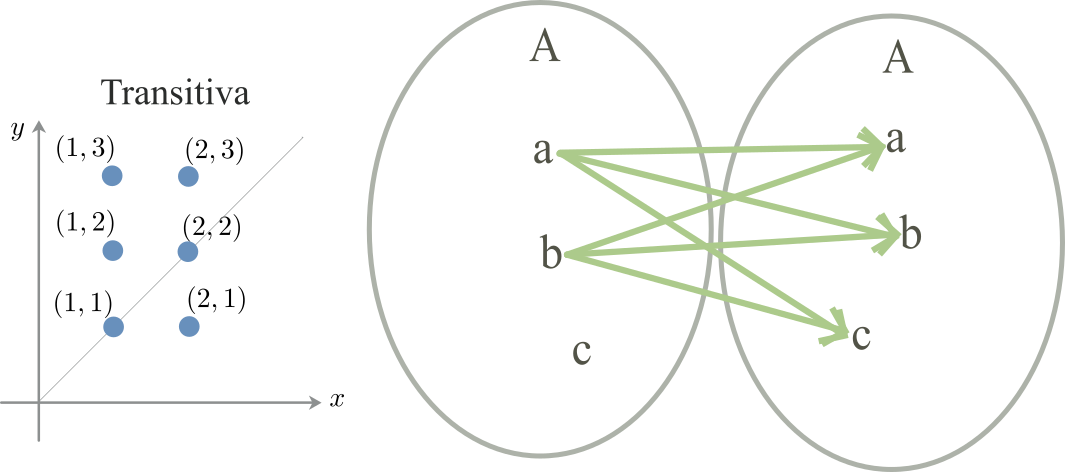

In [ ]:
A = Set('a':'g')
A² = A × A
println("Propiedad Transitiva")
println("-------------------------")
# 1. Calcula el producto cartesiano
A²_M = prod_rep(A, A)
println("A² = A × A: ")
display(A²_M)

# 2. Predicado: (x,y) ∈ A² | x = d ∨ x = y
𝓡 = Set([
    ('a','b'), ('b','c'), ('a','c'),
    ('d','e'), ('e','f'), ('d','f'),
    ('b','a'), ('e','d'), ('d','d'),
    ('e','e'), ('a','a'), ('b','b'),
    ])
println("Conjunto Relación 𝓡: $(𝓡)")
𝓡_repre(tup) = tup ∈ 𝓡
println("Predicado (x,y) ∈ A² | (x,y) ∈ 𝓡: ")
display(𝓡_repre.(A²_M))

# 3. Check: si R es antisimétrica según la proposición:
# ∀x,y,z ∈ U | xRy ∧ yRz → xRz o tambien (𝓡 ∘ 𝓡) ⊆ 𝓡
es_transitiva = (𝓡 ∘ 𝓡) ⊆ 𝓡
println("¿R es transitiva?: ", es_transitiva)

Propiedad Transitiva
-------------------------
A² = A × A: 


7×7 Matrix{Tuple{Char, Char}}:
 ('a', 'a')  ('a', 'b')  ('a', 'c')  …  ('a', 'e')  ('a', 'f')  ('a', 'g')
 ('b', 'a')  ('b', 'b')  ('b', 'c')     ('b', 'e')  ('b', 'f')  ('b', 'g')
 ('c', 'a')  ('c', 'b')  ('c', 'c')     ('c', 'e')  ('c', 'f')  ('c', 'g')
 ('d', 'a')  ('d', 'b')  ('d', 'c')     ('d', 'e')  ('d', 'f')  ('d', 'g')
 ('e', 'a')  ('e', 'b')  ('e', 'c')     ('e', 'e')  ('e', 'f')  ('e', 'g')
 ('f', 'a')  ('f', 'b')  ('f', 'c')  …  ('f', 'e')  ('f', 'f')  ('f', 'g')
 ('g', 'a')  ('g', 'b')  ('g', 'c')     ('g', 'e')  ('g', 'f')  ('g', 'g')

Conjunto Relación 𝓡: Set([('e', 'f'), ('b', 'a'), ('b', 'b'), ('e', 'd'), ('a', 'b'), ('e', 'e'), ('b', 'c'), ('d', 'd'), ('d', 'f'), ('d', 'e'), ('a', 'c'), ('a', 'a')])
Predicado (x,y) ∈ A² | (x,y) ∈ 𝓡: 


7×7 BitMatrix:
 1  1  1  0  0  0  0
 1  1  1  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  1  1  1  0
 0  0  0  1  1  1  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

¿R es transitiva?: true


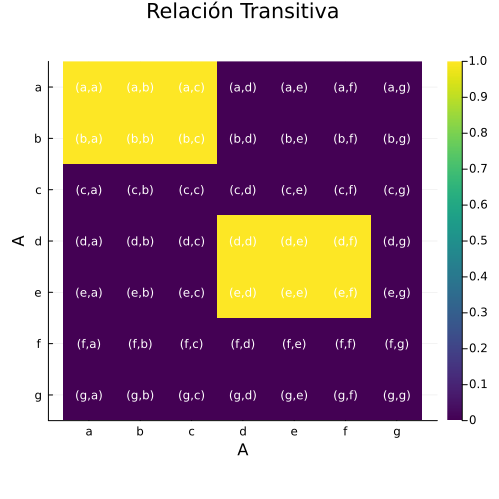

In [ ]:
A = collect('a':'g')
M = 𝓡_repre.(A²_M)
M_int = Int.(M)

# 1. Creamos el heatmap y lo guardamos en `p`
p = Plots.heatmap(
    1:length(A), 1:length(A), M_int;
    xlabel = "A",
    ylabel = "A",
    title = "Relación Transitiva",
    aspect_ratio = :equal,
    colorbar = true,
    yflip = true,
    xticks = (1:length(A), string.(A)),
    yticks = (1:length(A), string.(A)),
    c = :viridis,
    size = (500, 500),
)

# 2. Agregamos todas las anotaciones al plot `p`
for (i, a) in enumerate(A), (j, b) ∈ enumerate(A)
    annotate!(p, j, i, Plots.text("($a,$b)", 8, :white, halign = :center))
end

# 3. Mostramos (o devolvemos) la figura
display(p)

## Tipos: Relación de equivalencia
---
Es un tipo de relación $𝓔$ que tiene tres propiedades:
> * Reflexiva
> * Simétrica
> * Transitiva

Es decir el conjunto de tuplas $𝓔$ tiene tuplas que cumplen con las tres condiciones:
> * $_x𝓡_x$
> * $_x𝓡_y → _y𝓡_x$
> * $_x𝓡_y ∧ _y𝓡_z → _x𝓡_z$

Es decir de la forma: $𝓔 = \{(x,x), (x,y), (y,x), (y,z), (x,z),\dots\}$



### Clases de la equivalencia:
---
Una consecuencia de que el conjunto $𝓔$ sea de esta forma es que si convertimos el `Set` a un `Dict`:

> donde las `keys` son el primer elemento de la tupla `tup[1]` y los `values` son una lista `[tup[2], value2,...]` es decir todos los elementos con los que este relacionado `tup[1]`.

Va a ocurrir algo muy curioso y es que los valores de la tupla (`tup[1]` y `tup[2]`) es decir los relacionados entre si van a tener los mismos `values`, es decir:
> `values(dic[tup[1]]) == values(dic[tup[2]])`

En matematicas a los valores de la llave `key:value` se les llama **clases de la equivalencia** $[x]=\{y\in U |\: _x𝓔_y\}$ y es un conjunto de todos los elementos con los que esta relacionado otro elemento. Y si calculamos el conjunto clase de equivalencia de dos elementos que estan relacionado entre si (e.g $[x]$ y $[y]$ pero que $_x𝓡_y$) entonces su conjunto clase es igual $[x]=[y]$ y por lo mismo, si $_x\require{cancel}\cancel{𝓡}_y$ (es decir no relación) entonces necesariamente $[x]\neq [y]$.





In [ ]:
# Convertir las relaciones a diccionarios
function dic_converter(R::Set{Tuple{x,y}}) where {x, y}
    d = Dict{x, Set{y}}() # Vacio

    for (k,_) ∈ R
        # [x]={y∈U|x𝓔y}
        for v ∈ A
            if (k,v) ∈ R
                push!(
                    get!(d, k, Set{y}()), v
                    ) # Insert new k:v
            end
        end
    end
    return d
end

dic_converter (generic function with 1 method)

In [ ]:
A = Set('a':'g')
A² = A × A
A²_M = prod_rep(A, A)
println("Relación: equivalencia")
println("-------------------------")
# 1. Definimos una 𝓡 con las tres propiedades
𝓡_reflexive = Set((a,a) for a ∈ A)
𝓡_symetric = Set([
    ('a','b'), ('b','a'),
    ('b','c'), ('c','b'),
    ('a','c'), ('c','a'),
    ('d','e'), ('e','d'),
    ('e','f'), ('f','e'),
    ('d','f'), ('f','d'),
    ])
𝓡_transitive = Set([
    ('a','b'), ('b','c'), ('a','c'),
    ('d','e'), ('e','f'), ('d','f'),
    ('b','a'), ('e','d'), ('d','d'),
    ('e','e'), ('a','a'), ('b','b'),
    ])
𝓔 = 𝓡_reflexive ∪ 𝓡_transitive ∪ 𝓡_symetric
println("Conjunto Relación 𝓔: $(𝓔)")
𝓔⁻¹ = Set((tup[2], tup[1]) for tup ∈ 𝓔)
println("Predicado x𝓔y: ")
𝓔_repre(tup) = tup ∈ 𝓔
display(𝓔_repre.(A²_M))

# 2. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([(a, a) for a ∈ A]) ⊆ 𝓔
es_simetrica = 𝓔⁻¹ ⊆ 𝓔
es_transitiva = (𝓔 ∘ 𝓔) ⊆ 𝓔
println("¿es reflexiva?: $(es_reflexiva), \n¿es simetrica?:$(es_simetrica), \n¿es transitiva?:$(es_transitiva)")


Conjunto Relación 𝓔: Set([('e', 'f'), ('c', 'b'), ('b', 'b'), ('c', 'a'), ('f', 'd'), ('e', 'd'), ('a', 'b'), ('b', 'c'), ('a', 'a'), ('f', 'f'), ('b', 'a'), ('f', 'e'), ('c', 'c'), ('e', 'e'), ('d', 'd'), ('d', 'f'), ('g', 'g'), ('d', 'e'), ('a', 'c')])
Predicado x𝓔y: 


7×7 BitMatrix:
 1  1  1  0  0  0  0
 1  1  1  0  0  0  0
 1  1  1  0  0  0  0
 0  0  0  1  1  1  0
 0  0  0  1  1  1  0
 0  0  0  1  1  1  0
 0  0  0  0  0  0  1

¿es reflexiva?: true, 
¿es simetrica?:true, 
¿es transitiva?:true


¿Por qué $[x] = [y]$ si $_x𝓔_y$?

> Si $_x𝓔_y$ (es decir $(x,y) \in 𝓔$) y por la propiedad simétrica $(y,x) \in 𝓔$ entonces por ahora:  
>> $[x]=\{y\} ∧ [y]=\{x\}$,
>>
>> $[x]=[y]$.

> Pero, por la propiedad reflexiva entonces pasa que: $(x,x) \in 𝓔 ∧ (y,y) \in 𝓔$ entonces por ahora:
>> $[x]=\{y, x\} = [y]=\{x, y\}$,
>>
>> $[x]=[y]$.

> Pero, por la propiedad transitiva $(x,y) \in 𝓔 ∧ (y,z) \in 𝓔 → (x,z) \in 𝓔$ entonces finalmente:
>> $[x]=\{y, x, z\} ∧ [y]=\{x, y, z\}$,
>>
>> $[x]=[y]$.

Entonces, por esto si $_x𝓔_y$ entonces $[x] = [y]$

In [ ]:
# 3. Calculamos los conjuntos: Clase de equivalencia
clases = dic_converter(𝓔)
println("Clases [x]:")
display(clases)
# 4. Comprobamos que si x𝓔y entonces [x]=[y]
println("[a] = [b] = [c]: $(clases['a'] == clases['b'] == clases['c'] )")
println("[f] = [d] = [e]: $(clases['f'] == clases['d'] == clases['e'] )")

Clases [x]:


Dict{Char, Set{Char}} with 7 entries:
  'f' => Set(['f', 'd', 'e'])
  'g' => Set(['g'])
  'c' => Set(['a', 'c', 'b'])
  'a' => Set(['a', 'c', 'b'])
  'e' => Set(['f', 'd', 'e'])
  'd' => Set(['f', 'd', 'e'])
  'b' => Set(['a', 'c', 'b'])

[a] = [b] = [c]: true
[f] = [d] = [e]: true


### Conjunto cociente $U/𝓔$ y Particion $P$:

Entonces si colocamos todas las clases $[x]$ en un nuevo conjunto llamado **Conjunto cociente $U/𝓔$** que sería entonces el **conjunto de "conjuntos clase"** (clase=$[x]=\{x,y,z\}$), es decir:
> $U/𝓔 = \{clase1, clase2, clase3\}$

Todas las clases que son iguales desaparecen (no puede haber elmentos repetidos en un conjunto). Y entonces este nuevo conjunto tendría las siguientes propiedades:
> * La unión de todos los elementos $[x] \in U/𝓔$ da como resultado $U$: $⋃_{[x] \in U/𝓔} [x] = U$
> * Todos los elementos $[x]$ de $U/𝓔$ son disjuntos dos a dos: $[x] ∩ [y] = ∅ \lor [x] = [y]$   

Todo lo anterior implica que $U$ esta siendo partido en trozos que no se solapan entre si... Por tanto, $U/𝓔$ genera una **Partición ($P$)** que podemos definir como una familia de subconjuntos no vacios de $U$.

En general toda relacion de equivalencia $𝓔$ genera una partición $P$ (familia de conjuntos) del universo al permitir que exista un conjunto conciente de clases $U/𝓔$. Es decir, el universo se puede particionar usando una relación de equivalencia.

In [ ]:
# Suponiendo que el Universo es:
Universo = A
∅  = Set()
# Conjunto cociente
U_c_𝓔 = Set(values(clases))
println("Conjunto cociente U/𝓔:")
display(U_c_𝓔)
# Para A,B ∈ U/𝓔 | (A=B ∨ A∩B=∅) ∧ (⋃A∈U/𝓔 A = U)
is_partition(cociente_set) = ( ∪( U_c_𝓔... ) == Universo ) && ( ∩( U_c_𝓔... ) == ∅ )
println("Es particion de U: $( is_partition(U_c_𝓔) )")

Conjunto cociente U/𝓔:


Set{Set{Char}} with 3 elements:
  Set(['f', 'd', 'e'])
  Set(['a', 'c', 'b'])
  Set(['g'])

Es particion de U: true


✨ **Una de las sorpresas mas grandes de todo esto** ✨

Los numeros $\mathbb{Z}$ y $\mathbb{Q}$ realmente no son números como los $\mathbb{N}$ realmente son clases generadas a partir de una partición de $\mathbb{N}$.

Y la relación de equivalencia 𝓔 que genera los conjuntos cocientes $\mathbb{Z}=\mathbb{N} \times \mathbb{N}/𝓔$ y $\mathbb{Q}=\mathbb{N}^2/𝓔$ son la resta ($𝓔_-$) y la divión ($𝓔_/$).

Si... la resta y la división no son más que relaciones de equivalencia que generan una partición de $\mathbb{N}^2$ definida por un conjunto cociente ($\mathbb{N}^2/𝓔$) cuyos elementos son conjuntos clase $[x]$ que les hemos puesto las etiquetas de ..., -3, -2, -1, 0, 1, 2,3, ...

Lo que pasa es que a la hora de operar olvidamos que son conjuntos clase y los trabajamos como números. Es el poder que nos da esta abstracción.

In [ ]:
# Relación de equivalencia resta definiendo primeros 10 ℤ
# 1. Definimos el Universo
A = Set(1:10)
A² = A × A
A²_A² = A²×A²
A²_A²_M = prod_rep(A², A²)
println("Conjunto ℕ^2×ℕ^2:")
display(A⁴_M)

Conjunto ℕ^2×ℕ^2:


100×100 Matrix{Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}}}:
 ((1, 1), (1, 1))    ((1, 1), (1, 2))    …  ((1, 1), (10, 10))
 ((1, 2), (1, 1))    ((1, 2), (1, 2))       ((1, 2), (10, 10))
 ((1, 3), (1, 1))    ((1, 3), (1, 2))       ((1, 3), (10, 10))
 ((1, 4), (1, 1))    ((1, 4), (1, 2))       ((1, 4), (10, 10))
 ((1, 5), (1, 1))    ((1, 5), (1, 2))       ((1, 5), (10, 10))
 ((1, 6), (1, 1))    ((1, 6), (1, 2))    …  ((1, 6), (10, 10))
 ((1, 7), (1, 1))    ((1, 7), (1, 2))       ((1, 7), (10, 10))
 ((1, 8), (1, 1))    ((1, 8), (1, 2))       ((1, 8), (10, 10))
 ((1, 9), (1, 1))    ((1, 9), (1, 2))       ((1, 9), (10, 10))
 ((1, 10), (1, 1))   ((1, 10), (1, 2))      ((1, 10), (10, 10))
 ((2, 1), (1, 1))    ((2, 1), (1, 2))    …  ((2, 1), (10, 10))
 ((2, 2), (1, 1))    ((2, 2), (1, 2))       ((2, 2), (10, 10))
 ((2, 3), (1, 1))    ((2, 3), (1, 2))       ((2, 3), (10, 10))
 ⋮                                       ⋱  
 ((9, 9), (1, 1))    ((9, 9), (1, 2))       ((9, 9), (10, 10))
 ((9, 1

In [ ]:
# 2. Definimos la resta como (a,b)𝓔(c,d) ⇔ a-b = c-d
# Dos restas son equivalentes si dan el mismo resultado
x𝓔y(tup::Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}}) = tup[1][1] + tup[2][2] == tup[1][2] + tup[2][1]
# {((a,b), (c,d)) ∈ N^2xN^2 | (a,b)𝓔(c,d)}
𝓔 = Set(tup for tup ∈ A²_A² if x𝓔y(tup))
𝓔⁻¹ = Set((tup[2], tup[1]) for tup ∈ 𝓔)
predicado_M =  x𝓔y.(A²_A²_M)
println("Predicado (a,b)𝓔(c,d)):")
display(predicado_M)
println("Conjunto 𝓔:")
println(𝓔)
# 3. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([((a, a), (a, a)) for a ∈ A]) ⊆ 𝓔
es_simetrica = 𝓔⁻¹ ⊆ 𝓔
es_transitiva = (𝓔 ∘ 𝓔) ⊆ 𝓔
println("¿es reflexiva?: $(es_reflexiva), \n¿es simetrica?:$(es_simetrica), \n¿es transitiva?:$(es_transitiva)")

Predicado (a,b)𝓔(c,d)):


100×100 BitMatrix:
 1  0  0  0  0  0  0  0  0  0  0  1  0  …  1  0  0  0  0  0  0  0  0  0  0  1
 0  1  0  0  0  0  0  0  0  0  0  0  1     0  1  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0  …  0  0  0  0  0  0  0  0  0  0  1  0
 1  0  0  0  0  0  0  0  0  0  0  1  0     1  0  0  0  0  0  0  0  0  0  0  1
 0  1  0  0  0  0  0  0  0  0  0  0  1     0 

Conjunto 𝓔:
Set([((5, 1), (5, 1)), ((6, 6), (5, 5)), ((9, 8), (8, 7)), ((4, 1), (8, 5)), ((7, 1), (10, 4)), ((1, 6), (1, 6)), ((5, 6), (8, 9)), ((4, 3), (4, 3)), ((8, 6), (4, 2)), ((7, 8), (7, 8)), ((7, 8), (5, 6)), ((8, 5), (6, 3)), ((5, 4), (8, 7)), ((10, 10), (7, 7)), ((3, 1), (5, 3)), ((1, 1), (10, 10)), ((8, 4), (8, 4)), ((8, 2), (7, 1)), ((4, 3), (6, 5)), ((4, 2), (6, 4)), ((8, 2), (8, 2)), ((1, 9), (1, 9)), ((3, 4), (7, 8)), ((3, 4), (5, 6)), ((4, 5), (8, 9)), ((9, 10), (8, 9)), ((8, 6), (9, 7)), ((5, 3), (3, 1)), ((10, 6), (10, 6)), ((4, 3), (9, 8)), ((2, 9), (1, 8)), ((2, 5), (2, 5)), ((4, 6), (7, 9)), ((4, 1), (5, 2)), ((5, 9), (3, 7)), ((8, 9), (3, 4)), ((4, 4), (7, 7)), ((3, 3), (3, 3)), ((5, 1), (7, 3)), ((3, 9), (2, 8)), ((4, 6), (8, 10)), ((9, 8), (7, 6)), ((3, 8), (1, 6)), ((10, 9), (10, 9)), ((5, 3), (4, 2)), ((2, 8), (3, 9)), ((6, 7), (1, 2)), ((3, 1), (7, 5)), ((6, 10), (1, 5)), ((4, 3), (2, 1)), ((7, 7), (8, 8)), ((6, 10), (6, 10)), ((5, 4), (7, 6)), ((6, 10), (4, 8

In [ ]:
# Convertir las relaciones a diccionarios
function dic_converter(R::Set{Tuple{Tuple{a,b}, Tuple{c,d}}}) where {a,b,c,d}
    conciente_dic = Dict{Any, Set{Tuple{c,d}}}() # Vacio

    for (k,_) ∈ R
        # [(a,b))]={(c,d)∈U|(a,b)𝓔(c,d)}
        for v ∈ A²
            if (k,v) ∈ R
                push!(
                    get!(conciente_dic, k, Set()), v
                    ) # Insert new k:v
            end
        end
    end
    return conciente_dic
end

dic_converter (generic function with 2 methods)

In [ ]:
# 4. Calculamos los conjuntos: Clase de equivalencia
clases = dic_converter(𝓔)
println("Clases [(a,b)]]:")
clases

Clases [(a,b)]]:


Dict{Any, Set{Tuple{Int64, Int64}}} with 100 entries:
  (7, 1)   => Set([(9, 3), (10, 4), (7, 1), (8, 2)])
  (4, 6)   => Set([(6, 8), (2, 4), (1, 3), (5, 7), (4, 6), (8, 10), (3, 5), (7,…
  (5, 5)   => Set([(5, 5), (9, 9), (1, 1), (10, 10), (3, 3), (2, 2), (7, 7), (8…
  (9, 3)   => Set([(9, 3), (10, 4), (7, 1), (8, 2)])
  (7, 8)   => Set([(4, 5), (7, 8), (1, 2), (8, 9), (9, 10), (6, 7), (3, 4), (5,…
  (7, 10)  => Set([(7, 10), (2, 5), (3, 6), (4, 7), (1, 4), (6, 9), (5, 8)])
  (9, 4)   => Set([(9, 4), (8, 3), (10, 5), (7, 2), (6, 1)])
  (8, 9)   => Set([(4, 5), (7, 8), (1, 2), (8, 9), (9, 10), (6, 7), (3, 4), (5,…
  (7, 2)   => Set([(9, 4), (8, 3), (10, 5), (7, 2), (6, 1)])
  (4, 7)   => Set([(7, 10), (2, 5), (3, 6), (4, 7), (1, 4), (6, 9), (5, 8)])
  (1, 9)   => Set([(2, 10), (1, 9)])
  (2, 1)   => Set([(10, 9), (3, 2), (6, 5), (8, 7), (9, 8), (2, 1), (4, 3), (7,…
  (10, 1)  => Set([(10, 1)])
  (6, 5)   => Set([(10, 9), (3, 2), (6, 5), (8, 7), (9, 8), (2, 1), (4, 3), (7,…
  (2, 8)   =

Demonos cuenta que las clases calculadas realmente son los numeros enteros:
```julia
(7, 1)   => Set([(9, 3), (10, 4), (7, 1), (8, 2)])
(4, 6)   => Set([(6, 8), (2, 4), (1, 3), (5, 7), (4, 6), (8, 10), (3, 5), (7,…
(5, 5)   => Set([(5, 5), (9, 9), (1, 1), (10, 10), (3, 3), (2, 2), (7, 7), (8…
(9, 3)   => Set([(9, 3), (10, 4), (7, 1), (8, 2)])
(7, 8)   => Set([(4, 5), (7, 8), (1, 2), (8, 9), (9, 10), (6, 7), (3, 4), (5,…
```
> `(7, 1)=(10, 4)=(8, 2)` es lo mismo que `7-1 = 6`
>
>`(7, 8)=(4, 5)=(1, 2)` es lo mismo que `7-8 = -1`
>
>`(1, 1)=(2, 2)= ...=(10, 10)` es lo mismo que `0`

Entonces, ¿por que no renombrar las `key`?

In [ ]:
# 5. Renombramos las tuplas key como numeros ℤ
for key_old in keys(clases)
    if key_old isa Tuple
        a, b = key_old
        key = a - b
        clases[key] = clases[key_old]
        delete!(clases, key_old)
    end
end
# Note: de los primero 10 ℕ hemos podido definir los primeros 20 ℤ
println("Primeros ℤ:")
clases

Primeros ℤ:


Dict{Any, Set{Tuple{Int64, Int64}}} with 19 entries:
  5  => Set([(9, 4), (8, 3), (10, 5), (7, 2), (6, 1)])
  6  => Set([(9, 3), (10, 4), (7, 1), (8, 2)])
  -5 => Set([(5, 10), (1, 6), (2, 7), (4, 9), (3, 8)])
  -7 => Set([(1, 8), (3, 10), (2, 9)])
  4  => Set([(5, 1), (9, 5), (8, 4), (6, 2), (7, 3), (10, 6)])
  -4 => Set([(4, 8), (6, 10), (3, 7), (5, 9), (2, 6), (1, 5)])
  -2 => Set([(6, 8), (2, 4), (1, 3), (5, 7), (4, 6), (8, 10), (3, 5), (7, 9)])
  7  => Set([(8, 1), (9, 2), (10, 3)])
  2  => Set([(7, 5), (10, 8), (3, 1), (8, 6), (4, 2), (5, 3), (9, 7), (6, 4)])
  0  => Set([(5, 5), (9, 9), (1, 1), (10, 10), (3, 3), (2, 2), (7, 7), (8, 8), …
  -1 => Set([(4, 5), (7, 8), (1, 2), (8, 9), (9, 10), (6, 7), (3, 4), (5, 6), (…
  9  => Set([(10, 1)])
  -9 => Set([(1, 10)])
  -3 => Set([(7, 10), (2, 5), (3, 6), (4, 7), (1, 4), (6, 9), (5, 8)])
  -6 => Set([(4, 10), (2, 8), (1, 7), (3, 9)])
  8  => Set([(10, 2), (9, 1)])
  1  => Set([(10, 9), (3, 2), (6, 5), (8, 7), (9, 8), (2, 1), (4, 3), (

In [ ]:
# 6. Comborbamos que los numeros ℤ son una partición de ℕ^2
# Suponiendo que el Universo es:
Universo = A²
∅  = Set()
# Conjunto cociente
U_c_𝓔 = Set(values(clases))
println("Conjunto cociente U/𝓔:")
display(U_c_𝓔)
# Para A,B ∈ U/𝓔 | (A=B ∨ A∩B=∅) ∧ (⋃A∈U/𝓔 A = U)
is_partition(cociente_set) = ( ∪( U_c_𝓔... ) == Universo ) && ( ∩( U_c_𝓔... ) == ∅ )
println("Es particion de U: $( is_partition(U_c_𝓔) )")

Conjunto cociente U/𝓔:


Set{Set{Tuple{Int64, Int64}}} with 19 elements:
  Set([(8, 1), (9, 2), (10, 3)])
  Set([(1, 10)])
  Set([(6, 8), (2, 4), (1, 3), (5, 7), (4, 6), (8, 10), (3, 5), (7, 9)])
  Set([(4, 8), (6, 10), (3, 7), (5, 9), (2, 6), (1, 5)])
  Set([(7, 10), (2, 5), (3, 6), (4, 7), (1, 4), (6, 9), (5, 8)])
  Set([(1, 8), (3, 10), (2, 9)])
  Set([(7, 4), (9, 6), (5, 2), (4, 1), (6, 3), (10, 7), (8, 5)])
  Set([(2, 10), (1, 9)])
  Set([(10, 9), (3, 2), (6, 5), (8, 7), (9, 8), (2, 1), (4, 3), (7, 6), (5, 4)])
  Set([(4, 5), (7, 8), (1, 2), (8, 9), (9, 10), (6, 7), (3, 4), (5, 6), (2, 3)])
  Set([(5, 10), (1, 6), (2, 7), (4, 9), (3, 8)])
  Set([(9, 3), (10, 4), (7, 1), (8, 2)])
  Set([(10, 1)])
  Set([(10, 2), (9, 1)])
  Set([(5, 5), (9, 9), (1, 1), (10, 10), (3, 3), (2, 2), (7, 7), (8, 8), (6, 6)…
  Set([(9, 4), (8, 3), (10, 5), (7, 2), (6, 1)])
  Set([(5, 1), (9, 5), (8, 4), (6, 2), (7, 3), (10, 6)])
  Set([(4, 10), (2, 8), (1, 7), (3, 9)])
  Set([(7, 5), (10, 8), (3, 1), (8, 6), (4, 2), (5, 3), (9, 7)

Es particion de U: true


## Tipos: Relación de orden
---
Es un tipo de relación $≼$ que tiene tres propiedades:
> * Reflexiva
> * Antisimétrica
> * Transitiva

> **Nota:** $≼$ no significa "menor que" sino que simboliza el conjunto relación de orden.

Es decir el conjunto de tuplas $≼$ tiene tuplas que cumplen con las tres condiciones:
> * $_x𝓡_x$
> * $_x𝓡_y ∧ _y𝓡_x → x=y$
> * $_x𝓡_y ∧ _y𝓡_z → _x𝓡_z$

Es decir de la forma: $≼ = \{(x,x), (x,y), (y,z), (x,z),\dots\}$

A la vez puede ser de dos tipos $≼$:
> * **Total:** todos los elementos de $U$ estan en $≼$ o en su inversa $≼^{-1}$. Este predicado se evalua desde la lógica de predicados como $∀x,y∈U | _x𝓡_y ∨ _y𝓡_x$ y desde los conjuntos como $≼^{-1} ∪ ≼ = U × U$ a lógica de predicados usando
> * **Parcial:** cuando es una relación de orden $≼$ que no cumple la proposición anterior

Hay muchos ejemplos de relaciones de orden como: contenido en $⊂$, que es de orden parcial; o la tipica "menor que que" $≤$, que es de orden total.

In [ ]:
A = Set('a':'g')
A² = A × A
Universo = A²
A²_M = prod_rep(A, A)
println("Relación: orden")
println("-------------------------")
# 1. Definimos una 𝓡 con las tres propiedades
𝓡_reflexive = Set((a,a) for a ∈ A)
𝓡_antisymetric = Set([
    ('a','b'), ('b','c'), ('c','d'),
    ('d','e'), ('e','f'), ('f','g'),
    ])
𝓡_transitive = Set([
    ('a','c'), ('b','d'), ('c','e'), ('e','g'),
    ('a','d'), ('b','e'), ('a','e'),
    ('a','f'), ('a','g'),
    ('b','f'), ('b','g'),
    ('c','f'), ('c','g'),
    ('d','f'), ('d','g')
    ])
≼ = 𝓡_reflexive ∪ 𝓡_transitive ∪ 𝓡_antisymetric
println(":: Conjunto Relación ≼: $(≼)")
≼⁻¹ = Set((tup[2], tup[1]) for tup ∈ ≼)
println(":: Predicado x≼y: ")
𝓡_repre(tup) = tup ∈ ≼
display(𝓡_repre.(A²_M))

# 2. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([(a, a) for a ∈ A]) ⊆ ≼
es_antisimetrica = ∩(≼⁻¹, ≼) ⊆ Set([(a, a) for a ∈ A])
es_transitiva = ∘(≼, ≼) ⊆ ≼
es_orden_total = ∪(≼⁻¹, ≼) == Universo

println(":: ¿es reflexiva?: $(es_reflexiva), \n¿es antisimetrica?:$(es_antisimetrica), \n¿es transitiva?:$(es_transitiva)")
println(":: ¿es una R. Orden total?: $(es_orden_total)")

:: Conjunto Relación ≼: Set([('e', 'f'), ('a', 'g'), ('b', 'b'), ('c', 'e'), ('a', 'e'), ('c', 'f'), ('b', 'd'), ('a', 'b'), ('a', 'f'), ('b', 'g'), ('c', 'g'), ('e', 'g'), ('b', 'e'), ('d', 'g'), ('b', 'c'), ('a', 'a'), ('a', 'd'), ('f', 'f'), ('c', 'd'), ('c', 'c'), ('e', 'e'), ('d', 'd'), ('d', 'f'), ('g', 'g'), ('d', 'e'), ('a', 'c'), ('b', 'f'), ('f', 'g')])
:: Predicado x≼y: 


7×7 BitMatrix:
 1  1  1  1  1  1  1
 0  1  1  1  1  1  1
 0  0  1  1  1  1  1
 0  0  0  1  1  1  1
 0  0  0  0  1  1  1
 0  0  0  0  0  1  1
 0  0  0  0  0  0  1

:: ¿es reflexiva?: true, 
¿es antisimetrica?:true, 
¿es transitiva?:true
:: ¿es una R. Orden total?: true


¿Por qué $≼$ representa una relación de orden?

> Si tenemos $_x≼_y$ por la propiedad **antisimétrica** solo cuando $x=y$ permite que $_y≼_x$ y por tanto se debe cumplir la propiedad **reflexiva**:  
>> Esto explica por que en la matriz todo los unos estan por encima de la diagonal e incluyen a la diagonal.
>> Por esto, la relación se cumple para $_a≼_b$ y para $_a≼_a$ pero no para $_b\require{cancel}\cancel{≼}_a$.

> Pero, por la propiedad **transitiva** si $_a≼_b$, $_b≼_c$, $_c≼_d, …$ etc. entonces siempre se va a cumplir que $_a≼_d$:
>> Por tanto, podemos resumir esto asi:

$$_a≼_b≼_c≼_d, …$$

Esto ultimo permite visualizar las relaciones de orden de una forma mas familiar.

### Conjunto Ordendado $(U, ≼)$
---
Es una **tupla** donde es primer elemento es el conjunto $U$ y el segundo elemento es el conjunto relacion orden $≼$ que define las relaciones entre los elementos de $U$.

Aqui ocurre una **abstracción importante** y es que el que dos elementos tengan una relacion de orden (su tupla esta en el conjunto ≼) se puede simplificar a una **proposición (a≤b)** ya que aunque $_a≼_b$ que se lee *"$a$ precede a $b$"*  realmente representa: $(a,b) \in ≼$; lo que la final es una proposición (`True`, `False`)

> **Intervalos:** este nuevo objeto permite definir nuevos **subconjuntos ordenados** de $(U, ≼)$ que llamaremos intervalos $[a, b]$. Pero, no olvidemos que $[a, b]$ es simplemente un subconjunto $[a, b] ⊂ (U, ≼)$. Hay de varios tipos:
>> * Abiertos, Cerrados y Semiabiertos: $[a, b], (a, b)$ y $[a, b)$
>>
>>  i.e. $[a, b) = \{ x\in U | a≤x≤b ∧  x\neq b\}$

>> * Abiertos y Cerrados (iniciales $(←, a), (←, a]$ o finales $(a, →), [a, →)$:
>>
>>  i.e. $(a, →) = \{ x\in U | a≤x ∧  x\neq a\}$



$\neq$

In [ ]:
A = Set('a':'g')
println("Conjunto ordenado: (U,≼)")
println("-------------------------")
# 1. Definimos una 𝓡 con las tres propiedades
𝓡_reflexive = Set((a,a) for a ∈ A)
𝓡_antisymetric = Set([
    ('a','b'), ('b','c'), ('c','d'),
    ('d','e'), ('e','f'), ('f','g'),
    ])
𝓡_transitive = Set([
    ('a','c'), ('b','d'), ('c','e'), ('e','g'),
    ('a','d'), ('b','e'), ('a','e'),
    ('a','f'), ('a','g'),
    ('b','f'), ('b','g'),
    ('c','f'), ('c','g'),
    ('d','f'), ('d','g')
    ])
≼ = 𝓡_reflexive ∪ 𝓡_transitive ∪ 𝓡_antisymetric

# 2. Definimos un conjunto ordenado
var"(U,≼)" = sort(collect(A), lt = (x, y) -> (x,y) ∈ ≼)
println(":: Conjunto ordenado (U,≼): $( var"(U,≼)" )")
precede = Dict()
# abstracción importante: a ≤ x < b ⇔ ((a,x)∈≼) ∧ ((x,b)∈≼) ∧ (x ≠ b)
precede["a ≤ x < b"] = (a,x,b) -> ((a, x) ∈ ≼) && ((x,b) ∈ ≼) && (x != b)
# 3. Calculamos el subconjunto ordenado [a,d) intervalo
var"[a,d)" = [
    x for x ∈ var"(U,≼)"
    if precede["a ≤ x < b"]('a', x, 'd') # a ≤ x < b
    ]
println(":: onjunto ordenado [a,d): $(var"[a,d)")")

:: Conjunto ordenado (U,≼): ['a', 'b', 'c', 'd', 'e', 'f', 'g']
:: onjunto ordenado [a,d): ['a', 'b', 'c']


### Relaciones de orden en $U^2$
---

En un conjunto $U^2$ es decir como en un plano no es claro como definir una relación de orden. Pero, existen dos formas:
> * **Orden lexicográfico $≼_L$:** este es un orden total i.e. $(a,b)≼_L(c,d)⇔ (a<c) ∨ ((a=c) ∧ (b ≤ d))$
> * **Orden Producto $≼_P$:** este es un orden parcial i.e. $(a,b)≼_P(c,d)⇔ (a≤c) ∧ (b ≤ d))$



In [ ]:
A = Set('a':'g')
A² = A × A
println("Orden lexicografico")
println("-------------------------")
# 1. Calcula el producto cartesiano
A²_M = prod_rep(A, A)
println("A² = A × A: ")
display(A²_M)
# 2. Predicado o proposicion: (a,b)≼L(c,d) | (a<c) ∨ ((a=c) ∧ (b≤d))
function predicado_lexico(tup_ab, tup_cd)
    a, b = tup_ab
    c, d = tup_cd
    return (a < c) || ((a==c) && (b≤d))
end
# 3. Conjunto relación de orden lexicografico ≼L
var"≼L" = Set(
    ((a, b), (c, d)) for (a, b) ∈ sort(collect(A²))
    for (c, d) ∈ sort(collect(A²))
    if predicado_lexico((a, b), (c, d))
    )
println(":: La relación de orden lexicografico ≼L tiene: $(length(var"≼L")) tuplas")
var"≼L⁻¹" = Set((tup[2], tup[1]) for tup ∈ var"≼L")

# 4. Definimos Predicado o proposicion del intervalo: (a,b) ≼L (x,y)
precede = Dict()
# abstracción importante: a ≤ x < b ⇔ ((a,x)∈≼) ∧ ((x,b)∈≼)
precede["(a,b) ≼L (x,y)"] = (a,b,x,y) -> (((a, b),(x,y)) ∈ var"≼L") # Funcion anonima
precede["(x,y) ≼L (c,d)"] = (x,y,c,d) -> (((x,y), (c, d)) ∈ var"≼L")

# 5. Definimos subconjunto intervalo lexicografico ([a,b],[c,d])≼L con el predicado "precede"
var"([a,b],[c,d])≼L" = Set(
    (x,y) for (x,y) ∈ A²
    if precede["(a,b) ≼L (x,y)"](('a','b')..., (x,y)...)
        && precede["(x,y) ≼L (c,d)"]((x,y)..., ('c','d')...)
    )
# 6. Predicado del intervalo:
interval_pred = A²_M .∈ Ref(var"([a,b],[c,d])≼L")
println(":: Predicado del intervalo ([a,b],[c,d])≼L:")
display(interval_pred)
println(":: Conjunto Intervalo ([a,b],[c,d])≼L: $(var"([a,b],[c,d])≼L")")

# 7. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([(a, a) for a ∈ A²]) ⊆ var"≼L"
es_antisimetrica = ∩(var"≼L⁻¹", var"≼L") ⊆ Set([(a, a) for a ∈ A²])
es_transitiva = ∘(var"≼L", var"≼L") ⊆ var"≼L"
Universo = A² × A²
es_orden_total = ∪(var"≼L⁻¹", var"≼L") == Universo

println("¿es reflexiva?: $(es_reflexiva), \n¿es simetrica?:$(es_antisimetrica), \n¿es transitiva?:$(es_transitiva)")
println(":: ¿es una R. Orden total?: $(es_orden_total)")

Orden lexicografico
-------------------------
A² = A × A: 


7×7 Matrix{Tuple{Char, Char}}:
 ('a', 'a')  ('a', 'b')  ('a', 'c')  …  ('a', 'e')  ('a', 'f')  ('a', 'g')
 ('b', 'a')  ('b', 'b')  ('b', 'c')     ('b', 'e')  ('b', 'f')  ('b', 'g')
 ('c', 'a')  ('c', 'b')  ('c', 'c')     ('c', 'e')  ('c', 'f')  ('c', 'g')
 ('d', 'a')  ('d', 'b')  ('d', 'c')     ('d', 'e')  ('d', 'f')  ('d', 'g')
 ('e', 'a')  ('e', 'b')  ('e', 'c')     ('e', 'e')  ('e', 'f')  ('e', 'g')
 ('f', 'a')  ('f', 'b')  ('f', 'c')  …  ('f', 'e')  ('f', 'f')  ('f', 'g')
 ('g', 'a')  ('g', 'b')  ('g', 'c')     ('g', 'e')  ('g', 'f')  ('g', 'g')

:: La relación de orden lexicografico ≼L tiene: 1225 tuplas
:: Predicado del intervalo ([a,b],[c,d])≼L:


7×7 BitMatrix:
 0  1  1  1  1  1  1
 1  1  1  1  1  1  1
 1  1  1  1  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

:: Conjunto Intervalo ([a,b],[c,d])≼L: Set([('a', 'g'), ('c', 'b'), ('a', 'e'), ('b', 'b'), ('c', 'a'), ('b', 'd'), ('a', 'b'), ('a', 'f'), ('b', 'g'), ('b', 'c'), ('b', 'e'), ('a', 'd'), ('c', 'd'), ('b', 'a'), ('c', 'c'), ('a', 'c'), ('b', 'f')])
¿es reflexiva?: true, 
¿es simetrica?:true, 
¿es transitiva?:true
:: ¿es una R. Orden total?: true


In [ ]:
A = Set('a':'g')
A² = A × A
println("Orden Producto")
println("-------------------------")
# 1. Calcula el producto cartesiano
A²_M = prod_rep(A, A)
println("A² = A × A: ")
display(A²_M)
# 2. Predicado o proposicion: (a,b)≼P(c,d) | (a≤c) ∧ (b≤d)
function predicado_prod(tup_ab, tup_cd)
    a, b = tup_ab
    c, d = tup_cd
    return (a ≤ c) && (b ≤ d)
end
# 3. Conjunto relación de orden producto ≼P
var"≼P" = Set(
    ((a, b), (c, d))
    for (a, b) ∈ sort(collect(A²))
    for (c, d) ∈ sort(collect(A²))
    if predicado_prod((a, b), (c, d))
    )
println(":: La relación de orden producto ≼P tiene: $(length(var"≼P")) tuplas")
var"≼P⁻¹" = Set((tup[2], tup[1]) for tup ∈ var"≼P")
# 4. Definimos Predicado o proposicion del intervalo: (a,b) ≼P (x,y)
precede = Dict()
# abstracción importante: a ≤ x < b ⇔ ((a,x)∈≼) ∧ ((x,b)∈≼)
precede["(a,b) ≼P (x,y)"] = (a,b,x,y) -> (((a, b),(x,y)) ∈ var"≼P") # Funcion anonima
precede["(x,y) ≼P (c,d)"] = (x,y,c,d) -> (((x,y), (c, d)) ∈ var"≼P")

# 5. Definimos subconjunto intervalo producto ([a,b],[c,d])≼P con el predicado "precede"
var"([a,b],[c,d])≼P" = Set(
    (x,y) for (x,y) ∈ A²
    if precede["(a,b) ≼P (x,y)"](('a','b')..., (x,y)...)
        && precede["(x,y) ≼P (c,d)"]((x,y)..., ('c','d')...)
    )
# 6. Predicado del intervalo:
interval_pred = A²_M .∈ Ref(var"([a,b],[c,d])≼P")
println(":: Predicado del intervalo ([a,b],[c,d])≼P:")
display(interval_pred)
println(":: Conjunto Intervalo ([a,b],[c,d])≼P: $(var"([a,b],[c,d])≼P")")

# 7. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([(a, a) for a ∈ A²]) ⊆ var"≼P"
es_antisimetrica = ∩(var"≼P⁻¹", var"≼P") ⊆ Set([(a, a) for a ∈ A²])
es_transitiva = ∘(var"≼P", var"≼P") ⊆ var"≼P"
Universo = A² × A²
es_orden_total = ∪(var"≼P⁻¹", var"≼P") == Universo

println("¿es reflexiva?: $(es_reflexiva), \n¿es simetrica?:$(es_antisimetrica), \n¿es transitiva?:$(es_transitiva)")
println(":: ¿es una R. Orden total?: $(es_orden_total)")

Orden Producto
-------------------------
A² = A × A: 


7×7 Matrix{Tuple{Char, Char}}:
 ('a', 'a')  ('a', 'b')  ('a', 'c')  …  ('a', 'e')  ('a', 'f')  ('a', 'g')
 ('b', 'a')  ('b', 'b')  ('b', 'c')     ('b', 'e')  ('b', 'f')  ('b', 'g')
 ('c', 'a')  ('c', 'b')  ('c', 'c')     ('c', 'e')  ('c', 'f')  ('c', 'g')
 ('d', 'a')  ('d', 'b')  ('d', 'c')     ('d', 'e')  ('d', 'f')  ('d', 'g')
 ('e', 'a')  ('e', 'b')  ('e', 'c')     ('e', 'e')  ('e', 'f')  ('e', 'g')
 ('f', 'a')  ('f', 'b')  ('f', 'c')  …  ('f', 'e')  ('f', 'f')  ('f', 'g')
 ('g', 'a')  ('g', 'b')  ('g', 'c')     ('g', 'e')  ('g', 'f')  ('g', 'g')

:: La relación de orden producto ≼P tiene: 784 tuplas
:: Predicado del intervalo ([a,b],[c,d])≼P:


7×7 BitMatrix:
 0  1  1  1  0  0  0
 0  1  1  1  0  0  0
 0  1  1  1  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0
 0  0  0  0  0  0  0

:: Conjunto Intervalo ([a,b],[c,d])≼P: Set([('b', 'd'), ('a', 'b'), ('c', 'c'), ('b', 'c'), ('c', 'b'), ('c', 'd'), ('b', 'b'), ('a', 'c'), ('a', 'd')])
¿es reflexiva?: true, 
¿es simetrica?:true, 
¿es transitiva?:true
:: ¿es una R. Orden total?: false


### Relaciones de orden en $A ⊂ (U, ≼)$
---
Un subconjunto $A$ de un conjunto ordenado $(U, ≼)$ es tambien un conjunto ordenado. Entonces, $A$ es un subconjunto ordenado $(A, ≼)$ cuya relación de orden $≼$ es la misma del conjunto que lo contiene.

Si $A$ es un subconjunto de $(U, ≼)$ debido a que la relación de orden $≼$ define quien "precede" a quien es posible pensar que **existe otros subconjuntos** de $U$ que estan **precediendo** o **sucediendo** a $A$. Estos conjuntos se llaman:

> * **Cota superior:** es un subconjuto de $(U, ≼)$ cuyos elementos son $u\in U$ suceden a los de $A$. Es decir todos los elementos del universo que estan despues a los de $A$. i.e. $\{u\in U | x≤u, \enspace  ∀x\in A\}$
>> Nota: $x≤u ⇔  (x,u)\in ≼$
> * **Cota inferior:** es un subconjuto de $(U, ≼)$ cuyos elementos son $d\in U$ preceden a los de $A$. Es decir todos los elementos del universo que estan antes a los de $A$. i.e. $\{d\in U | d≤x, \enspace ∀x\in A\}$

Por tanto, puede ocurrir que $A$ esté en cualquier **posición respecto a la relación de orden** $≼$. Es decir si esta muy abajo puede que no exista un conjunto "Cota inferior". Entonces, según lo dicho pueden ocurrir tres casos:
> * **$A$ acotado superiormente:** cuando solo existe el conjunto "cota superior"
> * **$A$ acotado inferiormente:** cuando solo existe el conjunto "cota inferior"
> * **$A$ acotado:** cuando exiten ambos "cota superior" y "cota inferior".

Ahora, suponiendo que **$A$ es un conjunto acotado** es interesante saber cual es el elemento del conjunto "cota superior" ("cota inferior") mas cercano a $A$ segun la relacion de orden $≼$ y a su vez, saber cuales son los elementos de $A$ que esta mas cercanos a los elementos de los conjuntos de "cotas".

En el primer caso, es decir el elemento de las cotas más cercano a $A$. En terminos de la relación $≼$ significa que:

> * **Supremo $u$ (Ínfimo $i$):** existe un elemento $s\in$ "cota superior" ($i\in$ "cota inferior") tal que todos los elementos $u\in$"cota superior"($d\in$"cota inferior") suceden (preceden) a $s$ ($i$). i.e. $\sup(A) = \{s\in \text{cota superior(A)}|s≼u, ∀u\in \text{cota superior(A)}\}$ (i.e. $\inf(A) = \{i\in \text{cota inferior(A)}|d≼i, ∀d\in \text{cota inferior(A)}\}$)

Es decir el $\sup(A)$ seria el elemento que esta simpre a la izquierda dentro de la tupla $(\sup(A),s)\in ≼$ siendo $s \in \text{cota superior(A)}$. En le caso del $\inf(A)$ es el elemento que siempre esta a la derecha de la tupla $(d, \inf(A))\in ≼$ siendo $d \in \text{cota inferior(A)}$.

Y en el segundo caso, es decir el elemento de $A$ más cercano a las cotas:

> * **máximo $M$ (mínimo $m$):** existe un elemento $M\in A$ ($m\in A$) tal que todos los elementos de $A$ preceden (suceden) a $M$ ($m$). i.e. $\max(A) = \{M\in A|x≼M, ∀x\in A\}$ (i.e. $\min(A) = \{m\in A|m≼x, ∀x\in A\}$)

Es decir el $\max(A)$ seria el elemento que esta simpre a la derecha dentro de la tupla $(x, \max(A))\in ≼$ siendo $x \in A$. En le caso del $\min(A)$ es el elemento que siempre esta a la izquierda de la tupla $(\min(A), x)\in ≼$ siendo $x \in A$.

De esto último es evidente que si $A$ tiene $\max(A)$ entonces posse $\sup(A)$ y que estos son iguales $\max(A)=\sup(A)$. Lo mismo para $\min(A)=\inf(A)$. Es decir el $\sup(A)$ ($\inf(A)$) es el mínimo (máximo) del conjunto "cota superior (A)" ("cota inferior (A)"). Mientras que el $\max(A)$ ($\min(A)$) es el máximo (mínimo) del conjunto $A$.


In [ ]:
var"(U,≼)" = sort(collect(Set('a':'z')))
A = Set('a':'g')
A² = A × A
A²_M = prod_rep(A, A)
println("Conjunto ordenado: (U,≼)")
println("-------------------------")
println("A ⊆ (U,≼): $(A ⊆ var"(U,≼)")")
# 1. Definimos una 𝓡 con las tres propiedades
𝓡_reflexive = Set((a,a) for a ∈ var"(U,≼)")
copy_universe = copy(var"(U,≼)")
𝓡_transitive_antisymetric = Set(
    (i, j)
    for i in 'a':'z'
    for j in filter!(x -> x != i, copy_universe)
    )
≼ = 𝓡_reflexive ∪ 𝓡_transitive_antisymetric
println(":: Conjunto Relación ≼: $(≼)")
println(":: Conjunto ≼ tiene $(length(≼)) elementos")
≼⁻¹ = Set((tup[2], tup[1]) for tup ∈ ≼)
println(":: Predicado x≼y: ")
𝓡_repre(tup) = tup ∈ ≼
display(𝓡_repre.(prod_rep(var"(U,≼)", var"(U,≼)")))

# 2. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([(a, a) for a ∈ var"(U,≼)"]) ⊆ ≼
es_antisimetrica = ∩(≼⁻¹, ≼) ⊆ Set([(a, a) for a ∈ var"(U,≼)"])
es_transitiva = ∘(≼, ≼) ⊆ ≼
es_orden_total = ∪(≼⁻¹, ≼) == var"(U,≼)" × var"(U,≼)"

println(":: ¿es reflexiva?: $(es_reflexiva), \n¿es antisimetrica?:$(es_antisimetrica), \n¿es transitiva?:$(es_transitiva)")
println(":: ¿es una R. Orden total?: $(es_orden_total)")

Conjunto ordenado: (U,≼)
-------------------------
A ⊆ (U,≼): true
:: Conjunto Relación ≼: Set([('m', 't'), ('b', 't'), ('d', 'o'), ('g', 'w'), ('f', 'm'), ('g', 'h'), ('x', 'z'), ('b', 'q'), ('a', 'f'), ('p', 'z'), ('l', 'r'), ('f', 'f'), ('a', 'k'), ('j', 'o'), ('a', 'q'), ('s', 's'), ('k', 's'), ('e', 'r'), ('s', 'u'), ('g', 'g'), ('a', 'm'), ('c', 'w'), ('i', 'k'), ('i', 'z'), ('m', 'r'), ('l', 'm'), ('m', 'y'), ('e', 'p'), ('l', 'o'), ('m', 'n'), ('j', 'q'), ('y', 'z'), ('a', 'b'), ('b', 'v'), ('f', 'l'), ('n', 'p'), ('d', 'g'), ('v', 'y'), ('g', 'm'), ('r', 'y'), ('g', 'x'), ('j', 'z'), ('e', 'h'), ('l', 't'), ('g', 'p'), ('b', 'b'), ('c', 'e'), ('i', 't'), ('i', 'u'), ('p', 'q'), ('b', 'k'), ('d', 'v'), ('b', 'g'), ('k', 'v'), ('e', 's'), ('f', 'r'), ('r', 'z'), ('v', 'w'), ('z', 'z'), ('a', 'd'), ('e', 'n'), ('a', 'r'), ('n', 'u'), ('k', 'q'), ('w', 'y'), ('s', 'y'), ('e', 'e'), ('e', 'w'), ('i', 'x'), ('n', 'x'), ('d', 'i'), ('m', 'x'), ('n', 'w'), ('v', 'z'), ('t', 'y'), ('g'

26×26 BitMatrix:
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1

:: ¿es reflexiva?: true, 
¿es antisimetrica?:true, 
¿es transitiva?:true
:: ¿es una R. Orden total?: true


In [ ]:
# 3. Definimos Predicado o proposicion de precedencia: x ≤ M
precede = Dict()
# abstracción importante: x ≤ M ⇔ (x,M)∈≼
precede["x ≤ M"] = (x,M) -> ((x, M) ∈ ≼) # Funcion anonima
precede["m ≤ x"] = (m,x) -> ((m, x) ∈ ≼) # Funcion anonima

# 4. Calculamos max y min
# {M∈A|x≼M,∀x∈A}
max = Set(
    M for M ∈ A
    if all( precede["x ≤ M"](x, M) for x ∈ A )
    )
# {m∈A|m≼x,∀x∈A}
min = Set(
    m for m ∈ A
    if all( precede["m ≤ x"](m, x) for x ∈ A )
    )
println(":: El max(A) = $(max) y el min(A) = $(min)")
# 5. Calculamos los conjuntos de cotas:
precede["x ≤ u"] = (x,u) -> ((x, u) ∈ ≼) # Funcion anonima
# {u∈U|x≤u,∀x∈A}
cota_sup = Set(
    u for u ∈ var"(U,≼)"
    if all(precede["x ≤ u"](x, u) for x ∈ A)
    )
println(":: El conjunto 'cota superior(A)' = $(cota_sup)")
precede["d ≤ x"] = (d,x) -> ((d, x) ∈ ≼) # Funcion anonima
# {d∈U|d≤x,∀x∈A}
cota_inf = Set(
    d for d ∈ var"(U,≼)"
    if all(precede["d ≤ x"](d, x) for x ∈ A)
    )
println(":: El conjunto 'cota iferior(A)' = $(cota_inf)")
# 6. Calculamos el supremo y el infimo de A
precede["s ≤ u"] = (s,u) -> ((s, u) ∈ ≼) # Funcion anonima
# {s∈cota superior(A)|s≼u,∀u∈cota superior(A)}
sup = Set(
    s for s ∈ cota_sup
    if all( precede["s ≤ u"](s, u) for u ∈ cota_sup )
    )
precede["d ≤ i"] = (d,i) -> ((d, i) ∈ ≼) # Funcion anonima
# {i∈cota inferior(A)|d≼i,∀d∈cota inferior(A)}
inf = Set(
    i for i ∈ cota_inf
    if all( precede["d ≤ i"](d, i) for d ∈ cota_inf )
    )
println(":: El sup(A): $(sup) y el inf(A): $(inf)")

:: El max(A) = Set(['g']) y el min(A) = Set(['a'])
:: El conjunto 'cota superior(A)' = Set(['n', 'w', 'o', 'h', 'j', 'i', 'k', 'r', 's', 't', 'q', 'y', 'p', 'm', 'z', 'g', 'v', 'l', 'u', 'x'])
:: El conjunto 'cota iferior(A)' = Set(['a'])
:: El sup(A): Set(['g']) y el inf(A): Set(['a'])


Sin, embargo ¿qué pasa cuando en $(U,≼)$ el ordeno no es total?. En subconjuntos ordenados $A$ con relaciones de orden parcial no existe un único $\max(A)$ ni $\min(A)$. Pueden existir varios elementos que actuén como mínimos y maximos locales, a estos se les conoce como **maximales y mínimales**:

> * **Máximal:** es un elemento $M \in A$ tal que no existen otros elementos $x \in A$ que succedan a $M$ i.e. $\{M\in A |x\neq M ∧ M≼x, \require{cancel}\cancel{∃}x \in A\}$. En terminos del conjunto $≼$ son elementos que siempre estan a la derecha en la tupla $(x, maximal(A))\in ≼$

> * **Minimal:** es un elemento $m \in A$ tal que no existen otros elementos $x \in A$ que precedan a $m$ i.e. $\{m\in A |x\neq m ∧ x≼m, \require{cancel}\cancel{∃}x \in A\}$. En terminos del conjunto $≼$ son elementos que siempre estan a la izquierda en la tupla $(minimal(A), x)\in ≼$.

Lo que pasa cuando exite $\max(A)$ y $\min(A)$ es que se vuelven los mismos maximales y minimales. i.e. $\max(A) = maximal(A)$ y $\min(A)=minimal(A)$ que es lo que ocurre en relaciones de orden total.

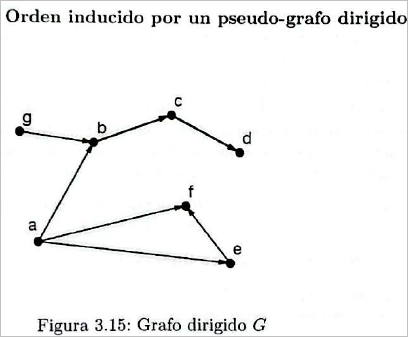

In [29]:
var"(V,≼)" = sort(collect(Set('a':'g')))
V = Set('a':'g')
𝓡_reflexive = Set((a,a) for a ∈ V)
𝓡_edges = Set([('a','b'), ('a','e'), ('a','f'), ('b','c'),('c','d'), ('e','f'), ('g','b')])
≼ = 𝓡_edges ∪ 𝓡_reflexive
V² = V × V
V²_M = prod_rep(V, V)
println("Grafo pseudo-dirigido: (V,≼)")
println("-------------------------")
println("V ⊆ (V,≼): $(V ⊆ var"(V,≼)")")

println(":: Conjunto Relación ≼: $(≼)")
println(":: Conjunto ≼ tiene $(length(≼)) elementos")
≼⁻¹ = Set((tup[2], tup[1]) for tup ∈ ≼)
println(":: Predicado x≼y: ")
𝓡_repre(tup) = tup ∈ ≼
display(𝓡_repre.(prod_rep(V, V)))

# 2. Comprobamos que cumple con las tres propiedades
es_reflexiva = Set([(a, a) for a ∈ var"(V,≼)"]) ⊆ ≼
es_antisimetrica = ∩(≼⁻¹, ≼) ⊆ Set([(a, a) for a ∈ var"(V,≼)"])
A = V; A² = V × V; # ignora esto
es_transitiva = ∘(≼, ≼) ⊆ ≼
es_orden_total = ∪(≼⁻¹, ≼) == var"(V,≼)" × var"(V,≼)"

println(":: ¿es reflexiva?: $(es_reflexiva), \n¿es antisimetrica?:$(es_antisimetrica), \n¿es transitiva?:$(es_transitiva)")
println(":: ¿es una R. Orden total?: $(es_orden_total)")

# 3. Definimos Predicado o proposicion de precedencia: x ≤ M
precede = Dict()
# abstracción importante: x ≤ M ⇔ (x,M)∈≼
precede["M ≤ x"] = (M,x) -> ((M, x) ∈ ≼) # Funcion anonima
precede["x ≤ m"] = (x,m) -> ((x, m) ∈ ≼) # Funcion anonima

# 4. Calculamos maximal y minimal
# {M∈A|x≠M ∧ M≼x, ¬∃x∈A}
maximal = Set(
    M for M ∈ V
    if !any( precede["M ≤ x"](M, x) && x != M for x ∈ V )
    )
# {m∈A|x≠m ∧ x≼m, ¬∃x∈A}
minimal = Set(
    m for m ∈ V
    if !any( precede["x ≤ m"](x, m) && x != m for x ∈ V )
    )
println(":: El maximal(V) = $(maximal) y el minimal(V) = $(minimal)")

Grafo pseudo-dirigido: (V,≼)
-------------------------
V ⊆ (V,≼): true
:: Conjunto Relación ≼: Set([('e', 'f'), ('f', 'f'), ('g', 'b'), ('a', 'e'), ('c', 'd'), ('b', 'b'), ('c', 'c'), ('a', 'b'), ('e', 'e'), ('a', 'f'), ('b', 'c'), ('d', 'd'), ('g', 'g'), ('a', 'a')])
:: Conjunto ≼ tiene 14 elementos
:: Predicado x≼y: 


7×7 BitMatrix:
 1  1  0  0  1  1  0
 0  1  1  0  0  0  0
 0  0  1  1  0  0  0
 0  0  0  1  0  0  0
 0  0  0  0  1  1  0
 0  0  0  0  0  1  0
 0  1  0  0  0  0  1

:: ¿es reflexiva?: true, 
¿es antisimetrica?:true, 
¿es transitiva?:false
:: ¿es una R. Orden total?: false
:: El maximal(V) = Set(['f', 'd']) y el minimal(V) = Set(['g', 'a'])
